### Tutorial 8: Calculating the density and heat capacity of an SiO-CO plasma

The most common use of minplascalc is expected to be the calculation of thermophysical properties of plasmas in LTE as a function of elemental composition, temperature, and pressure. For the more complex SiO-CO plasma, a JSON mixture file must be created by the user as shown in <a href="Tutorial 7 - SiCO Plasma LTE Composition.ipynb">Tutorial 7</a> to specify the plasma species present and the relative proportions of elements. 

For this tutorial we'll use the example mixture files shipped with minplascalc located in minplascalc/data/mixtures, and we'll look at three different SiO-CO mixtures ranging from 10% SiO to 90% SiO by mole to show how the properties are affected by different mixture ratios.

Start off by loading up the modules required:

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import minplascalc as mpc

Next, we create some minplascalc Mixture objects using the paths to the mixture files.

In [2]:
mixtures = [mpc.Mixture(str(mpc.MIXTUREPATH / "SiCO_10_90_plasma.json"), 1000, 101325),
            mpc.Mixture(str(mpc.MIXTUREPATH / "SiCO_50_50_plasma.json"), 1000, 101325),
            mpc.Mixture(str(mpc.MIXTUREPATH / "SiCO_90_10_plasma.json"), 1000, 101325)]

Next, set a range of temperatures to calculate the thermophysical properties at - in this case we're going from 1000 to 25000 K. Also initialise lists to store the property values for the various mixtures at each temperature.

In [3]:
temperatures = np.linspace(1000, 25000, 100)
densities = [[] for n in range(3)]
cps = [[] for n in range(3)]

Now we can perform the property calculations. We loop over all mixtures, and then all the temperatures setting the Mixture object's temperature attribute to the appropriate value, initialising the species numbers using the Mixture object's <span style="font-family: 'Courier';">initialiseNi(Ni)</span> function (which takes a list of the initial guesses of the $N_i$ value for each species), and calculating the LTE composition using the object's <span style="font-family: 'Courier';">solveGfe()</span> function. Once we have the LTE composition, we can calculate the plasma density by calling the Mixture object's <span style="font-family: 'Courier';">calculateDensity()</span> function.

$C_P$ is calculated using the Mixture object's <span style="font-family: 'Courier';">calculate_heat_capacity()</span> function. Recall that this works a little differently to the density calculation which is a straightforward formula which works on any (LTE and non-LTE) plasma composition - internally, the heat capacity function makes two additional function calls to <span style="font-family: 'Courier';">solveGfe()</span> at temperatures slightly above and slightly below the target temperature. A numerical derivative of $H$ then gives the LTE value of $C_P$ at that point.

Note that execution of these calculations is fairly compute intensive (increasingly so for increasing number of species present) and as a result the following code snippet may take a couple minutes or more to complete.

In [4]:
for i, mixture in enumerate(mixtures):
    for T in temperatures:
        mixture.T = T
        mixture.initialiseNi([1e20 for n in range(len(mixture.species))])
        mixture.solveGfe()
        densities[i].append(mixture.calculateDensity())
        cps[i].append(mixture.calculate_heat_capacity())

Now we can visualise the properties by plotting them against temperature, to see how they vary.

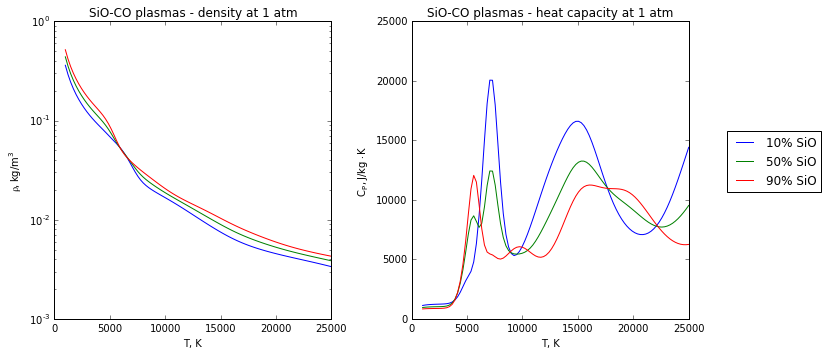

In [5]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))

labels = ["10% SiO", "50% SiO", "90% SiO"]

ax0.set_title("SiO-CO plasmas - density at 1 atm")
ax0.set_xlabel("T, K")
ax0.set_ylabel("$\mathregular{\\rho, kg/m^3}$")
for dens, lbl in zip(densities, labels):
    ax0.semilogy(temperatures, dens, label=lbl);

ax1.set_title("SiO-CO plasmas - heat capacity at 1 atm")
ax1.set_xlabel("T, K")
ax1.set_ylabel("$\mathregular{C_P, J/kg \cdot K}$")
for hcp, lbl in zip(cps, labels):
    ax1.plot(temperatures, hcp, label=lbl);

ax1.legend(bbox_to_anchor=(1.5, 0.65));

plt.tight_layout()

The impact of changing the elemental composition of the plasma is quite marked, particularly in the case of the heat capacity - the multiple overlapping peaks representing dissociation and ionisation of the various species move around considerably depending on whether the plasma is formed from mostly SiO, or mostly CO. The general trend is toward slightly lower values of $C_P$ and slightly higher values of $\rho$ for SiO-rich plasmas, but it does depend which temperature regime is being considered.